# 데이터 불러오기 및 정제

In [8]:
import pandas as pd

df = pd.read_csv('./datasets/all_merged.csv')

df = df[['VSL_ID', 'TIMESTAMP', 'SPEED', 'COG', 'HEADING', 'DRAFT',
         'LAT', 'LON', 'PORT_NAME']]
df = df.dropna()
df = df.sort_values(by=['VSL_ID', 'TIMESTAMP'])

# 1. 시계열 예측 (HEADING 예측 - LSTM)

In [10]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 한 선박만 예제로 사용
sample_ship = df[df['VSL_ID'] == df['VSL_ID'].iloc[0]].copy()

# 스케일링
scaler = MinMaxScaler()
scaled = scaler.fit_transform(sample_ship[['HEADING', 'COG', 'LAT', 'LON', 'SPEED']])

# 시퀀스 생성
def create_sequence(data, time_steps=10):
    x, y = [], []
    for i in range(len(data) - time_steps):
        x.append(data[i:i+time_steps])
        y.append(data[i+time_steps][0])  # HEADING 예측
    return np.array(x), np.array(y)

x_seq, y_seq = create_sequence(scaled, time_steps=10)

# LSTM 모델
model = Sequential([
    LSTM(64, input_shape=(10, 5)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(x_seq, y_seq, epochs=10, batch_size=32)


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 0.3636
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1910
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0738
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0169
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0184
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0456
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0494
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0330
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0151
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0073


# 2. 도착항 예측 (PORT_NAME 분류)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [18]:
# 입력 변수 및 타깃 설정
X = df[['HEADING', 'LAT', 'LON', 'SPEED', 'DRAFT']]
y = df['PORT_NAME']

In [20]:
# 타깃 라벨 인코딩
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [22]:
# 훈련/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2)

In [24]:
# 분류 모델 훈련
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [26]:
# 정확도 평가
accuracy = clf.score(X_test, y_test)
print("도착항 예측 정확도: ", accuracy)

도착항 예측 정확도:  0.3980769753103186


## LSTM 예측 로컬 실행 코드

Epoch 1/10


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 0.4846
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.2995
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1624
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0675
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0280
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0362
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0589
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0617
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0463
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 0.0263
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 313ms/step


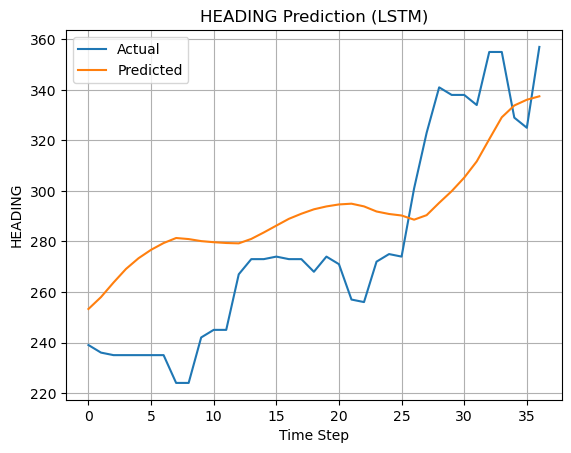

In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# 특정 선박 추출
ship = df[df['VSL_ID'] == df['VSL_ID'].iloc[0]].copy()
scaler = MinMaxScaler()
scaled = scaler.fit_transform(ship[['HEADING', 'COG', 'LAT', 'LON', 'SPEED']])

# 시퀀스 생성
def create_seq(data, steps=10):
    x, y = [], []
    for i in range(len(data)-steps):
        x.append(data[i:i+steps])
        y.append(data[i+steps][0])
    return np.array(x), np.array(y)

x, y = create_seq(scaled)

# 모델 구성
model = Sequential([
    LSTM(64, input_shape=(10, 5)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(x, y, epochs=10, batch_size=32)

# 예측
pred = model.predict(x)

# 복원
heading_idx = 0
y_true = scaler.inverse_transform(np.hstack([y.reshape(-1, 1), np.zeros((len(y), 4))]))[:, heading_idx]
y_pred = scaler.inverse_transform(np.hstack([pred, np.zeros((len(pred), 4))]))[:, heading_idx]

# 시각화
plt.plot(y_true, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.title("HEADING Prediction (LSTM)")
plt.xlabel("Time Step")
plt.ylabel("HEADING")
plt.legend()
plt.grid(True)
plt.show()

# 다른 방법

Epoch 1/15


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


649/649 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.6173 - loss: 1.0143 - val_accuracy: 0.8104 - val_loss: 0.4884
Epoch 2/15
649/649 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8128 - loss: 0.4951 - val_accuracy: 0.8484 - val_loss: 0.3928
Epoch 3/15
649/649 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8571 - loss: 0.3991 - val_accuracy: 0.8779 - val_loss: 0.3200
Epoch 4/15
649/649 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8761 - loss: 0.3392 - val_accuracy: 0.8808 - val_loss: 0.3074
Epoch 5/15
649/649 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8889 - loss: 0.3132 - val_accuracy: 0.8974 - val_loss: 0.2732
Epoch 6/15
649/649 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8940 - loss: 0.2883 - val_accuracy: 0.8973 - val_loss: 0.2790
Epoch 7/15
649/649 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8986 - loss: 0.2786 - val_accuracy: 0.9136 - val_loss: 0.2316
Epoch 8/15
649/649 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9104 - loss: 0.2480 - val_accuracy: 0.9184

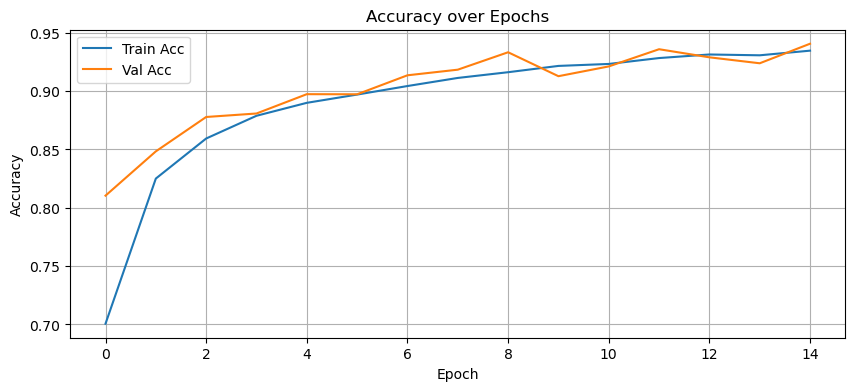

In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
df = pd.read_csv("./datasets/all_merged.csv")

# 2. 필요한 컬럼만 정제
df = df[['VSL_ID', 'TIMESTAMP', 'SPEED', 'COG', 'HEADING', 'DRAFT', 'LAT', 'LON', 'PORT_NAME']]
df = df.dropna()
df = df.sort_values(by=['VSL_ID', 'TIMESTAMP'])

# 3. 상위 5개 항구만 필터링 (정확도 향상)
top_ports = df['PORT_NAME'].value_counts().nlargest(5).index
df = df[df['PORT_NAME'].isin(top_ports)]

# 4. PORT_NAME 라벨 인코딩
le = LabelEncoder()
df['PORT_LABEL'] = le.fit_transform(df['PORT_NAME'])

# 5. 시계열 시퀀스 생성 함수
def create_sequences(df, seq_len=10):
    x, y = [], []
    grouped = df.groupby('VSL_ID')
    for _, group in grouped:
        group = group.sort_values(by='TIMESTAMP')
        features = group[['HEADING', 'LAT', 'LON', 'SPEED', 'DRAFT']].values
        labels = group['PORT_LABEL'].values
        if len(group) < seq_len + 1:
            continue
        scaler = MinMaxScaler()
        features = scaler.fit_transform(features)
        for i in range(len(group) - seq_len):
            x.append(features[i:i+seq_len])
            y.append(labels[i+seq_len])
    return np.array(x), np.array(y)

# 6. 시퀀스 생성
x_seq, y_seq = create_sequences(df, seq_len=10)
y_cat = to_categorical(y_seq)

# 7. 학습/검증 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(x_seq, y_cat, test_size=0.2, random_state=42)

# 8. LSTM 분류 모델 구성
model = Sequential([
    LSTM(64, input_shape=(10, 5)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(y_cat.shape[1], activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 9. 모델 학습
history = model.fit(x_train, y_train, epochs=15, batch_size=64, validation_split=0.2)

# 10. 평가
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("✅ 테스트 정확도:", round(test_accuracy * 100, 2), "%")

# 11. 학습 과정 시각화
plt.figure(figsize=(10, 4))
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


# 혼동 행렬 시각화까지 포함한 LSTM 예측 전체 코드

Epoch 1/15


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


649/649 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.6075 - loss: 1.0226 - val_accuracy: 0.8234 - val_loss: 0.4790
Epoch 2/15
649/649 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8190 - loss: 0.4766 - val_accuracy: 0.8752 - val_loss: 0.3514
Epoch 3/15
649/649 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.8600 - loss: 0.3766 - val_accuracy: 0.8889 - val_loss: 0.2948
Epoch 4/15
649/649 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8777 - loss: 0.3290 - val_accuracy: 0.8974 - val_loss: 0.2644
Epoch 5/15
649/649 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8857 - loss: 0.3071 - val_accuracy: 0.8878 - val_loss: 0.2828
Epoch 6/15
649/649 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8920 - loss: 0.2919 - val_accuracy: 0.9050 - val_loss: 0.2504
Epoch 7/15
649/649 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9023 - loss: 0.2631 - val_accuracy: 0.9199 - val_loss: 0.2297
Epoch 8/15
649/649 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9080 - loss: 0.2507 - val_accuracy: 0.9

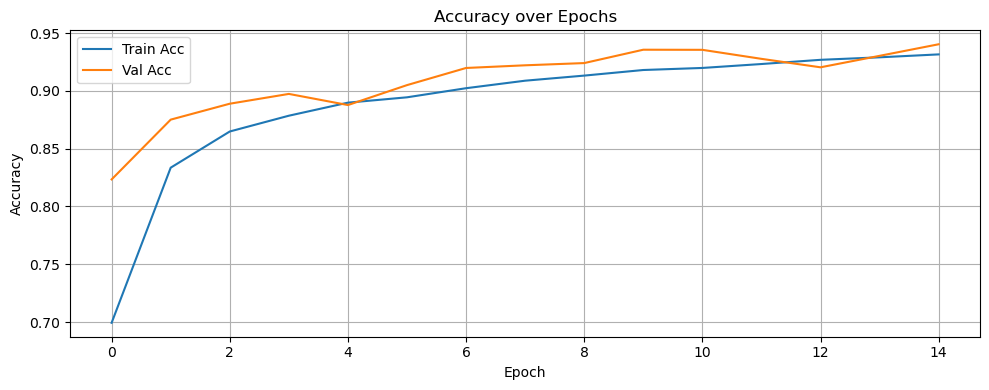

406/406 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


C:\Users\user\AppData\Local\Temp\ipykernel_35208\3295032611.py:90: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_35208\3295032611.py:90: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


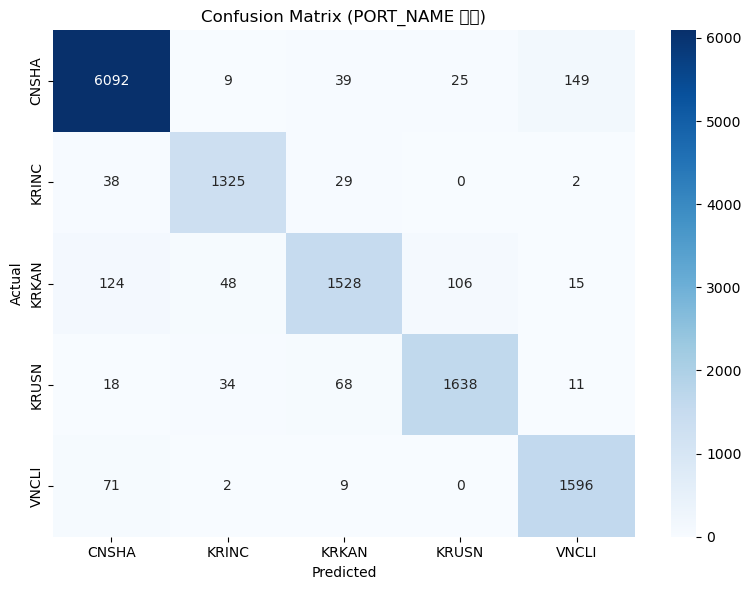

In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 로드
df = pd.read_csv("./datasets/all_merged.csv")
df = df[['VSL_ID', 'TIMESTAMP', 'SPEED', 'COG', 'HEADING', 'DRAFT', 'LAT', 'LON', 'PORT_NAME']]
df = df.dropna()
df = df.sort_values(by=['VSL_ID', 'TIMESTAMP'])

# 2. Top 5 항만만 추출
top_ports = df['PORT_NAME'].value_counts().nlargest(5).index
df = df[df['PORT_NAME'].isin(top_ports)]

# 3. 라벨 인코딩
le = LabelEncoder()
df['PORT_LABEL'] = le.fit_transform(df['PORT_NAME'])

# 4. 시계열 데이터 생성 함수
def create_sequences(df, seq_len=10):
    x, y = [], []
    grouped = df.groupby('VSL_ID')
    for _, group in grouped:
        group = group.sort_values(by='TIMESTAMP')
        features = group[['HEADING', 'LAT', 'LON', 'SPEED', 'DRAFT']].values
        labels = group['PORT_LABEL'].values
        if len(group) < seq_len + 1:
            continue
        scaler = MinMaxScaler()
        features = scaler.fit_transform(features)
        for i in range(len(group) - seq_len):
            x.append(features[i:i+seq_len])
            y.append(labels[i+seq_len])
    return np.array(x), np.array(y)

# 5. 시퀀스 및 레이블 생성
x_seq, y_seq = create_sequences(df, seq_len=10)
y_cat = to_categorical(y_seq)

# 6. 학습/테스트 분리
x_train, x_test, y_train, y_test = train_test_split(x_seq, y_cat, test_size=0.2, random_state=42)

# 7. LSTM 모델 구성
model = Sequential([
    LSTM(64, input_shape=(10, 5)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(y_cat.shape[1], activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 8. 학습
history = model.fit(x_train, y_train, epochs=15, batch_size=64, validation_split=0.2)

# 9. 정확도 평가
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("✅ 테스트 정확도:", round(test_accuracy * 100, 2), "%")

# 10. 학습 곡선 시각화
plt.figure(figsize=(10, 4))
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 11. 혼동 행렬 시각화
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (PORT_NAME 예측)")
plt.tight_layout()
plt.show()


# GeoJSON 기반 항만 시각화

In [40]:
!pip install geopandas

   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ----- ---------------------------------- 2.1/16.2 MB 9.8 MB/s eta 0:00:02
   -------------- ------------------------- 5.8/16.2 MB 13.5 MB/s eta 0:00:01
   ------------------------ --------------- 10.0/16.2 MB 15.5 MB/s eta 0:00:01
   ------------------------------------ --- 14.9/16.2 MB 17.4 MB/s eta 0:00:01
   ---------------------------------------- 16.2/16.2 MB 16.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   -------------------------- ------------- 4.2/6.3 MB 21.0 MB/s eta 0:00:01
   ---------------------------------------- 6.3/6.3 MB 19.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 18.8 MB/s eta 0:00:00


In [51]:
import folium
import geopandas as gpd

# GeoJSON 불러오기
ports = gpd.read_file("ports.geojson")

# 지도 객체 생성 (기본 위치는 한반도 중심)
m = folium.Map(location=[36.0, 128.0], zoom_start=6)

# 항구 마커 표시
for _, row in ports.iterrows():
    lat = row.geometry.y
    lon = row.geometry.x
    name = row['PORT_NAME']
    folium.Marker(
        location=[lat, lon],
        popup=name,
        icon=folium.Icon(color='blue', icon='ship', prefix='fa')
    ).add_to(m)

# 지도 저장
m.save("port_map.html")

In [56]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 데이터 로딩
df = pd.read_csv("./datasets/all_merged.csv")
df = df[['TIMESTAMP', 'LAT', 'LON', 'SPEED', 'COG', 'HEADING']]
df = df.dropna().sort_values(by='TIMESTAMP')

# 정규화
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[['LAT', 'LON', 'SPEED', 'COG', 'HEADING']])

# 시퀀스 생성
def create_xy(data, seq_len=10):
    x, y = [], []
    for i in range(len(data) - seq_len):
        x.append(data[i:i+seq_len])
        y.append(data[i+seq_len][:2])  # 다음 시점의 LAT, LON
    return np.array(x), np.array(y)

x, y = create_xy(scaled, seq_len=10)

# 학습/검증 분리
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# LSTM 회귀 모델
model = Sequential([
    LSTM(64, input_shape=(10, 5)),
    Dense(32, activation='relu'),
    Dense(2)  # LAT, LON
])
model.compile(optimizer='adam', loss='mse')
model.fit(x_train, y_train, epochs=15, batch_size=64)

# 예측 및 복원
y_pred = model.predict(x_test)
y_pred_inv = scaler.inverse_transform(np.hstack([y_pred, np.zeros((len(y_pred), 3))]))[:, :2]
y_test_inv = scaler.inverse_transform(np.hstack([y_test, np.zeros((len(y_test), 3))]))[:, :2]


Epoch 1/15


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2301/2301 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - loss: 0.0324
Epoch 2/15
2301/2301 ━━━━━━━━━━━━━━━━━━━━ 42s 10ms/step - loss: 0.0266
Epoch 3/15
2301/2301 ━━━━━━━━━━━━━━━━━━━━ 24s 10ms/step - loss: 0.0264
Epoch 4/15
2301/2301 ━━━━━━━━━━━━━━━━━━━━ 24s 10ms/step - loss: 0.0261
Epoch 5/15
2301/2301 ━━━━━━━━━━━━━━━━━━━━ 24s 10ms/step - loss: 0.0264
Epoch 6/15
2301/2301 ━━━━━━━━━━━━━━━━━━━━ 24s 10ms/step - loss: 0.0261
Epoch 7/15
2301/2301 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - loss: 0.0259
Epoch 8/15
2301/2301 ━━━━━━━━━━━━━━━━━━━━ 24s 10ms/step - loss: 0.0261
Epoch 9/15
2301/2301 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - loss: 0.0260
Epoch 10/15
2301/2301 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - loss: 0.0257
Epoch 11/15
2301/2301 ━━━━━━━━━━━━━━━━━━━━ 24s 10ms/step - loss: 0.0258
Epoch 12/15
2301/2301 ━━━━━━━━━━━━━━━━━━━━ 24s 10ms/step - loss: 0.0259
Epoch 13/15
2301/2301 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - loss: 0.0256
Epoch 14/15
2301/2301 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - loss: 0.0258
Epoch 15/15


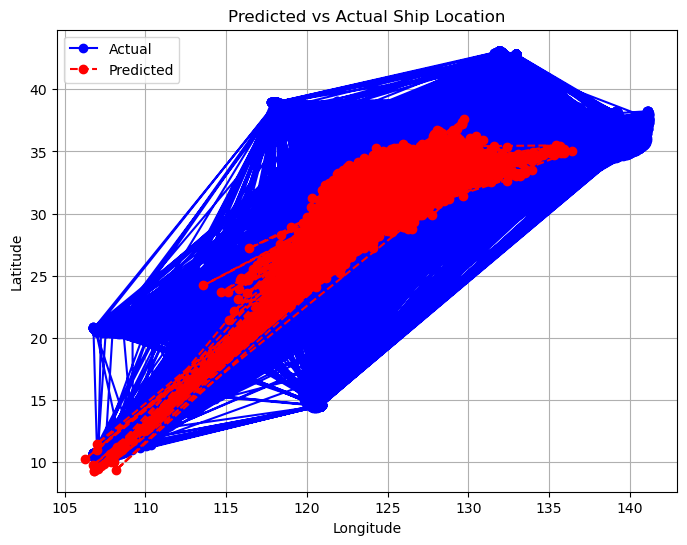

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(y_test_inv[:, 1], y_test_inv[:, 0], 'bo-', label='Actual')     # LON, LAT
plt.plot(y_pred_inv[:, 1], y_pred_inv[:, 0], 'ro--', label='Predicted') # LON, LAT
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Predicted vs Actual Ship Location')
plt.legend()
plt.grid(True)
plt.show()